In [40]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [41]:
df = pd.read_csv('salary_data_cleaned.csv')

In [42]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,job_state,age,javascript_yn,rest_yn,spark,angular,react,scala,cpp,python
0,Software Engineer,$44K-$95K (Glassdoor est.),Why You'll Love Working Here:\nBeing a TechSmi...,4.3,TechSmith Corporation\n4.3,"Okemos, MI",201 to 500 Employees,1987,Company - Private,Computer Hardware & Software,...,MI,33,0,1,0,0,0,0,0,0
1,Software Engineer,$60K-$125K (Glassdoor est.),Software Engineer\n\nJob Description\n\nSOFTWA...,3.0,CoStar Group\n3.0,"Atlanta, GA",1001 to 5000 Employees,1987,Company - Public,Computer Hardware & Software,...,GA,33,1,0,0,1,0,0,0,0
2,Software Engineer,$42K-$90K (Glassdoor est.),What you will be doing\n\nThe Software Enginee...,3.2,Ohio National Financial Services\n3.2,"Cincinnati, OH",501 to 1000 Employees,1909,Company - Private,Insurance Agencies & Brokerages,...,OH,111,0,1,0,0,0,0,0,0
3,Apple iOs Software Engineer,$65K-$122K (Glassdoor est.),"SP Global, Inc\nSP Global, Inc's mission is to...",3.8,"SP Global, Inc.\n3.8","Dayton, OH",10000+ Employees,1888,Company - Public,Financial Analytics & Research,...,OH,132,0,0,0,0,0,0,0,0
4,Software Engineer,$47K-$100K (Glassdoor est.),Role Overview\nThe Financial Services Group at...,3.0,DST Systems\n3.0,"Kansas City, MO",10000+ Employees,1986,Company - Public,Computer Hardware & Software,...,MO,34,1,1,0,1,1,0,0,0


In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python'],
      dtype='object')

In [44]:
def title_simplifier(title):
    if 'software engineer' in title.lower():
        return 'software engineer'
    elif 'full stack' in title.lower():
        return 'full stack'
    elif 'application' in title.lower():
        return 'application'
    elif 'software developer' in title.lower():
        return 'software developer'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'intern' in title.lower():
        return 'jr'
    else:
        return 'na'
		
## Job title and seniority 
		
##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title


In [45]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [46]:
df.job_simp.value_counts()

software engineer     523
na                    273
software developer    118
application            34
full stack             29
manager                12
Name: job_simp, dtype: int64

In [47]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        778
senior    199
jr         12
Name: seniority, dtype: int64

In [48]:
# Fix state Los Angeles 
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'cuyahoga' else 'OH')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'arapahoe' else 'WY')

df.job_state.value_counts()


CA    104
MD     66
VA     59
0      55
TX     51
IL     45
MA     43
OH     41
NY     39
CO     36
FL     31
NC     31
MI     27
AL     27
WI     27
PA     26
MN     26
IN     23
UT     22
GA     20
AZ     18
MO     17
NH     15
OR     14
KS     11
WA     11
OK     10
CT     10
NV      9
NJ      9
TN      8
ID      7
IA      5
VT      5
NE      5
NM      5
KY      4
RI      4
DC      4
PR      3
AR      2
WV      2
ME      2
LA      2
SC      2
MS      2
SD      1
WY      1
DE      1
MT      1
Name: job_state, dtype: int64

In [49]:
#  Job description length 
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      5506
1      3115
2      3921
3      4697
4      3078
5      3628
6      1652
7      2399
8      2106
9      3579
10     5290
11     4954
12     3947
13     1961
14     5059
15     2867
16     1540
17     4844
18     3076
19     3264
20     2866
21     3493
22     3704
23     1622
24     2818
25     5031
26     1944
27     3152
28     3122
29     2811
30     6205
31     3620
32     5643
33     3937
34     1743
35     4257
36     3566
37     4788
38     6410
39     3952
40     3127
41     4444
42     3245
43     2176
44     2686
45     2734
46     3103
47     4112
48     5630
49     2683
50     3235
51     2905
52     3450
53     2954
54     2126
55     2609
56     2529
57     4119
58     6049
59     5300
60     4663
61     4497
62     2937
63     2684
64     3628
65     4049
66     2555
67     2927
68     4245
69     4926
70     3752
71     4962
72     4400
73     4819
74     5196
75     3280
76     3742
77     2557
78     4698
79     5028
80     2493
81     1935
82     3412
83  

In [50]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [51]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary


In [52]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [53]:
df['company_txt']

0                                  TechSmith Corporation
1                                           CoStar Group
2                       Ohio National Financial Services
3                                        SP Global, Inc.
4                                            DST Systems
5                      ManTech International Corporation
6                                          Quicken Loans
7                               Torch Technologies, Inc.
8                               Nintendo of America Inc.
9                                                  Uline
10                               Nebraska Furniture Mart
11                          NCI Information Systems Inc.
12                                                  vRad
13                     DiTronics Financial Services, LLC
14                               Strattec Security Corp.
15                 By Light Professional IT Services LLC
16                          Patriot Federal Credit Union
17                             

In [54]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,age,javascript_yn,rest_yn,spark,angular,react,scala,cpp,python,desc_len
count,989.000000,989.000000,989.0,989.0,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000,989.000000
mean,2.792315,1297.859454,0.0,0.0,66.436805,121.448938,93.942872,24.969666,0.309403,0.364004,0.026289,0.166835,0.151668,0.182002,0.078868,0.239636,3667.440849
std,2.015703,943.128653,0.0,0.0,20.118759,24.341004,21.197310,34.231013,0.462482,0.481393,0.160075,0.373017,0.358881,0.386041,0.269668,0.427077,1361.675757
min,-1.000000,-1.000000,0.0,0.0,32.000000,66.000000,49.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,432.000000
25%,2.800000,-1.000000,0.0,0.0,52.000000,106.000000,79.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2675.000000
50%,3.600000,1969.000000,0.0,0.0,57.000000,116.000000,85.500000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3557.000000
75%,4.100000,1999.000000,0.0,0.0,76.000000,144.000000,111.000000,36.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4588.000000
max,5.000000,2019.000000,0.0,0.0,132.000000,164.000000,142.500000,189.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9681.000000


In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

<AxesSubplot:>

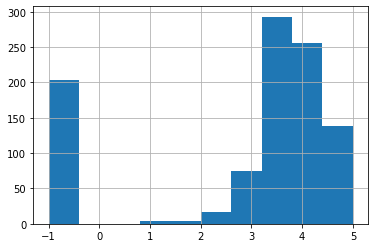

In [56]:
df.Rating.hist()

<AxesSubplot:>

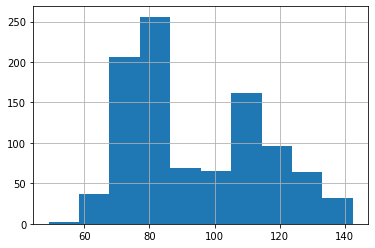

In [57]:
df.avg_salary.hist()

<AxesSubplot:>

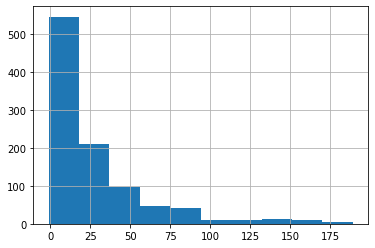

In [58]:
df.age.hist()

<AxesSubplot:>

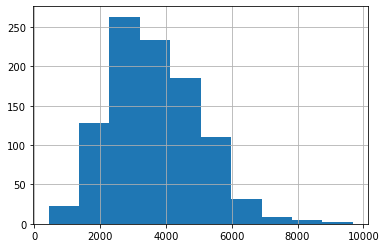

In [59]:
df.desc_len.hist()

<AxesSubplot:>

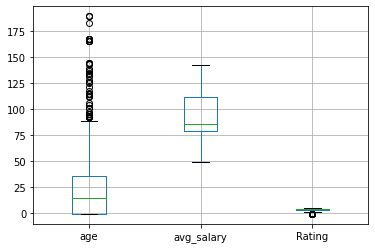

In [60]:
df.boxplot(column = ['age','avg_salary','Rating'])

<AxesSubplot:>

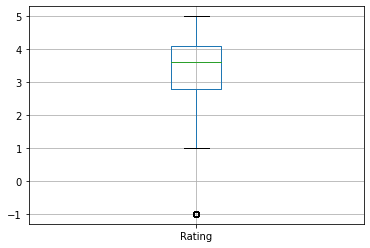

In [61]:
df.boxplot(column = 'Rating')

In [62]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.058763,0.340620,0.114112
avg_salary,0.058763,1.000000,0.042450,0.038377
Rating,0.340620,0.042450,1.000000,0.090478
desc_len,0.114112,0.038377,0.090478,1.000000


<AxesSubplot:>

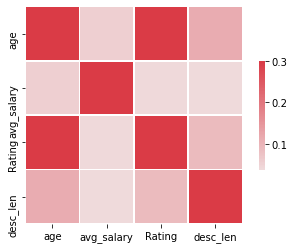

In [63]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [65]:
df_cat = df[['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'job_simp', 'seniority', 'desc_len']]

graph for Job Title: total = 436


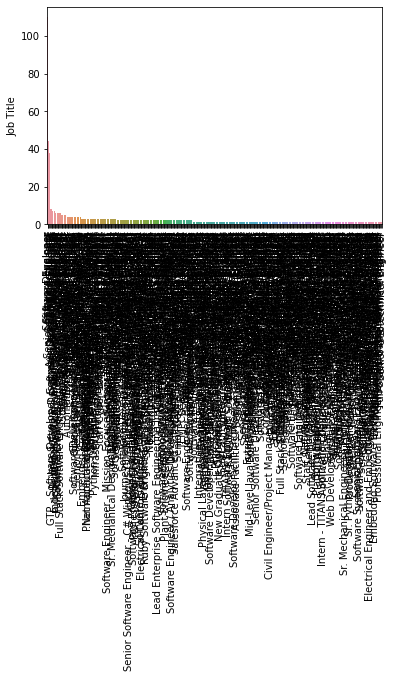

graph for Salary Estimate: total = 45


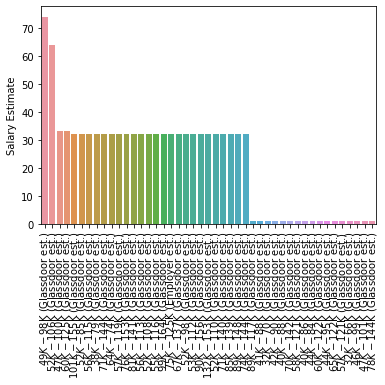

graph for Job Description: total = 642


C:\Users\kinim\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 61623 missing from current font.
  font.set_text(s, 0.0, flags=flags)


KeyboardInterrupt: 

In [66]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


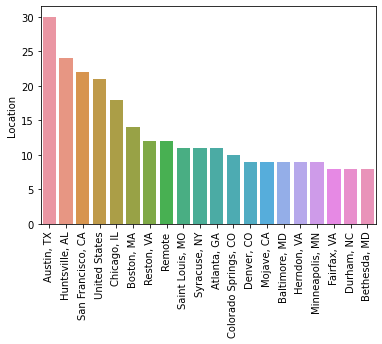

graph for company_txt: total = 20


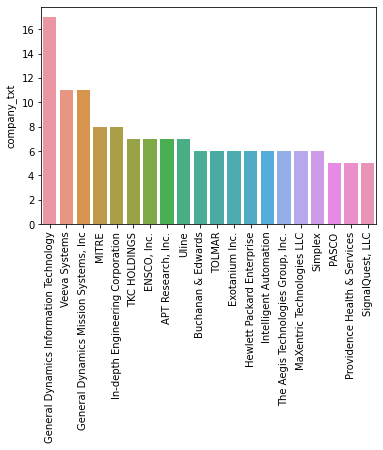

In [67]:
for i in df_cat[['Location','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [68]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [69]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
application,88.161765
full stack,94.362069
manager,91.875000
na,93.375458
software developer,95.322034
software engineer,94.327916


In [70]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp           seniority            
application        na          86.948276
                   senior      95.200000
full stack         na          93.270833
                   senior      99.600000
manager            na          98.312500
                   senior      79.000000
na                 na          92.570776
                   senior      96.638889
software developer na          94.856481
                   senior     100.350000
software engineer  jr          88.458333
                   na          93.920513
                   senior      96.223140

In [71]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                      
WY        software engineer   107.500000
WV        software engineer   112.000000
          na                  123.000000
WI        software engineer   108.750000
          software developer  108.277778
          na                   95.875000
          full stack           80.000000
          application          79.500000
WA        software engineer   101.142857
          na                   97.833333
          manager             109.000000
VT        na                  100.833333
          application          97.250000
VA        software developer  106.250000
          na                   88.714286
          full stack          104.250000
          software engineer    94.500000
UT        software engineer   101.538462
          software developer   93.000000
          na                   83.333333
          full stack           91.333333
TX        na                  106.650000
          application         123.000000
          full stack           80.000000
          manager              79.000000
          software developer   92.200000
          software engineer    96.933333
TN        software engineer    83.833333
          software developer   79.250000
          na                  102.000000
SD        software developer  118.500000
SC        software developer   73.500000
RI        software engineer    99.500000
          na                   79.500000
PR        application         128.000000
          na                  105.500000
          software developer   88.000000
PA        software engineer    96.307692
          software developer   92.900000
          na                  111.500000
          full stack          106.000000
OR        software developer  100.000000
          na                   93.500000
          full stack           91.500000
          software engineer    99.875000
OK        software engineer   105.250000
          software developer   83.250000
          na                   92.750000
OH        software engineer    89.531250
          software developer  101.333333
          na                   97.676471
          full stack          104.250000
          application         105.166667
NY        na                   90.368421
          manager             107.500000
          software engineer    91.833333
          software developer  102.125000
NV        software engineer    82.400000
          software developer  107.166667
          na                   80.000000
NM        software engineer   107.166667
          na                  100.000000
NJ        software engineer    92.500000
          na                  102.000000
NH        software engineer    98.500000
          na                   95.363636
          application          58.500000
NE        software engineer    71.125000
          na                  100.000000
NC        software engineer    93.480000
          na                   95.500000
          software developer  100.125000
MT        software engineer   107.500000
MS        na                   73.500000
MO        software engineer    97.166667
          software developer   69.000000
          na                   95.833333
          application          79.000000
MN        manager              99.500000
          software engineer    90.000000
          software developer  119.500000
          na                   83.416667
          full stack           76.166667
MI        software engineer    90.750000
          software developer  102.000000
          na                   89.250000
          application          69.000000
ME        na                   88.000000
          software developer   73.500000
MD        software developer   95.083333
          na                   83.875000
          software engineer    94.702381
MA        software engineer    93.057692
          software developer  108.800000
          na                  103.285714
          full stack          102.000000
          ap

In [72]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [73]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                      
WY        software engineer            1
WV        software engineer            1
          na                           1
WI        software engineer           10
          software developer           9
          na                           4
          full stack                   2
          application                  2
WA        software engineer            7
          na                           3
          manager                      1
VT        na                           3
          application                  2
VA        software developer           4
          na                          21
          full stack                   2
          software engineer           32
UT        software engineer           13
          software developer           3
          na                           3
          full stack                   3
TX        na                          10
          application                  1
          full stack                   1
          manager                      4
          software developer           5
          software engineer           30
TN        software engineer            3
          software developer           4
          na                           1
SD        software developer           1
SC        software developer           2
RI        software engineer            2
          na                           2
PR        application                  1
          na                           1
          software developer           1
PA        software engineer           13
          software developer           5
          na                           5
          full stack                   3
OR        software developer           1
          na                           2
          full stack                   3
          software engineer            8
OK        software engineer            2
          software developer           4
          na                           4
OH        software engineer           16
          software developer           3
          na                          17
          full stack                   2
          application                  3
NY        na                          19
          manager                      1
          software engineer           15
          software developer           4
NV        software engineer            5
          software developer           3
          na                           1
NM        software engineer            3
          na                           2
NJ        software engineer            8
          na                           1
NH        software engineer            3
          na                          11
          application                  1
NE        software engineer            4
          na                           1
NC        software engineer           25
          na                           2
          software developer           4
MT        software engineer            1
MS        na                           2
MO        software engineer            9
          software developer           1
          na                           6
          application                  1
MN        manager                      2
          software engineer           13
          software developer           2
          na                           6
          full stack                   3
MI        software engineer           14
          software developer           2
          na                          10
          application                  1
ME        na                           1
          software developer           1
MD        software developer          12
          na                          12
          software engineer           42
MA        software engineer           26
          software developer           5
          na                           7
          full stack                   1
          ap

In [74]:
pd.pivot_table(df[df.job_simp == 'software engineer'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
AR,123.000000
WV,112.000000
IA,111.000000
WI,108.750000
MT,107.500000
WY,107.500000
NM,107.166667
OK,105.250000
CT,104.900000


In [75]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'hourly', 'employer_provided',
       'min_salary', 'max_salary', 'avg_salary', 'company_txt', 'job_state',
       'age', 'javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python', 'job_simp', 'seniority', 'desc_len'],
      dtype='object')

In [ ]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [77]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'employer_provided','javascript_yn', 'rest_yn', 'spark', 'angular', 'react', 'scala',
       'cpp', 'python', 'Type of ownership','avg_salary']]

In [78]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.7    108.846154
 2.4    106.875000
 4.5    105.027778
 2.5    102.875000
 4.2     99.742424
 5.0     97.017241
 4.3     96.794643
 4.1     96.361111
 3.7     96.065574
 3.1     96.033333
 3.0     95.717391
 2.6     95.083333
 2.9     94.625000
 4.9     94.541667
 3.3     94.328571
 3.9     94.170455
 4.4     93.597222
-1.0     92.977941
 4.6     92.961538
 2.7     92.500000
 3.6     92.359375
 3.5     92.285714
 4.0     92.115385
 1.6     91.500000
 1.0     91.125000
 3.2     91.045455
 3.4     90.586207
 3.8     90.565574
 4.8     90.205882
 1.7     89.000000
 2.3     84.250000
 2.8     82.250000
 2.1     79.666667
 2.2     64.000000
Industry
                                          avg_salary
Industry                                            
Religious Organizations                   131.500000
Telecommunications Services               117.166667
Miscellaneous Manufacturing               112.000000
Cable, Internet & Telephone Provide

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [79]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),29,10
$1 to $5 million (USD),24,7
$10 to $25 million (USD),42,13
$10+ billion (USD),36,18
$100 to $500 million (USD),94,35
$2 to $5 billion (USD),20,10
$25 to $50 million (USD),50,11
$5 to $10 billion (USD),9,9
$5 to $10 million (USD),24,9


In [80]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [83]:
'''
OPTIONAL wordcloud
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()
'''

'\nOPTIONAL wordcloud\nwords = " ".join(df[\'Job Description\'])\n\ndef punctuation_stop(text):\n    """remove punctuation and stop words"""\n    filtered = []\n    stop_words = set(stopwords.words(\'english\'))\n    word_tokens = word_tokenize(text)\n    for w in word_tokens:\n        if w not in stop_words and w.isalpha():\n            filtered.append(w.lower())\n    return filtered\n\n\nwords_filtered = punctuation_stop(words)\n\ntext = " ".join([ele for ele in words_filtered])\n\nwc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)\nwc.generate(text)\n\nplt.figure(figsize=[10,10])\nplt.imshow(wc,interpolation="bilinear")\nplt.axis(\'off\')\nplt.show()\n'

In [84]:
df.to_csv('eda_data.csv')